In [1]:
!pip install geopandas -q

In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import norm

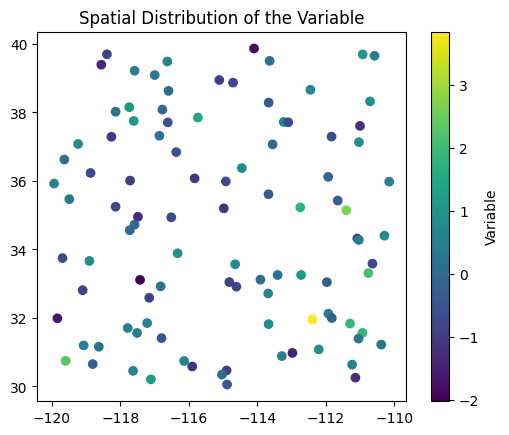

array([[<Axes: title={'center': 'Variable'}>]], dtype=object)

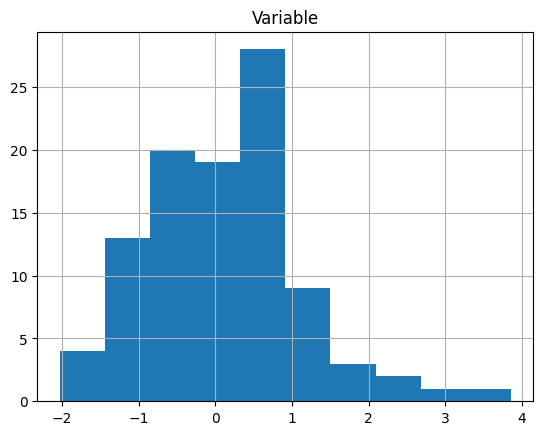

In [3]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate synthetic spatial data
np.random.seed(42)

# Create synthetic points with geographic coordinates
n_points = 100
lats = np.random.uniform(low=30, high=40, size=n_points)
lons = np.random.uniform(low=-120, high=-110, size=n_points)

# Create a variable (e.g., normally distributed)
variable = np.random.normal(loc=0, scale=1, size=n_points)


# Reading shapefile
# gdf = gpd.read_file('sth.shp')


# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    {'Variable': variable},
    geometry=gpd.points_from_xy(lons, lats)
)


# Plot the spatial distribution
gdf.plot(column='Variable', cmap='viridis', legend=True, legend_kwds={'label': "Variable"})
plt.title('Spatial Distribution of the Variable')
plt.show()


gdf.hist()

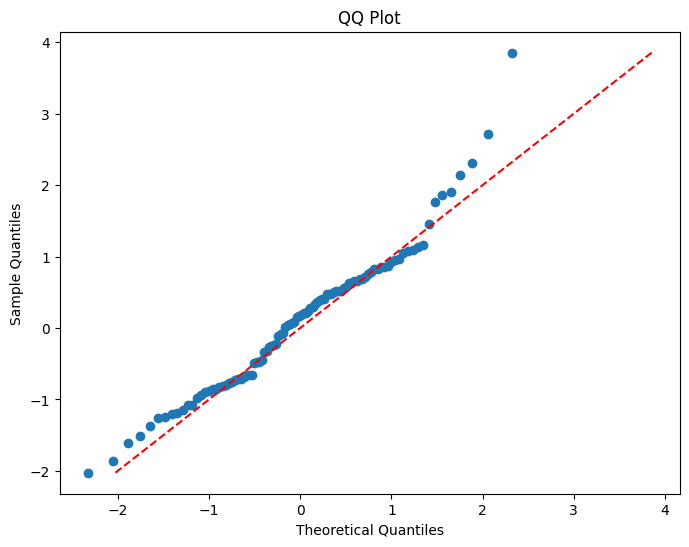

In [4]:
# Create a QQ plot for the variable
fig, ax = plt.subplots(figsize=(8, 6))

# Sort the variable for the QQ plot
sorted_variable = np.sort(variable)
expected_quantiles = norm.ppf(np.linspace(0.01, 0.99, n_points))

ax.scatter(expected_quantiles, sorted_variable)
ax.plot([sorted_variable.min(), sorted_variable.max()], [sorted_variable.min(), sorted_variable.max()], color='red', linestyle='--')
ax.set_title('QQ Plot')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

plt.show()

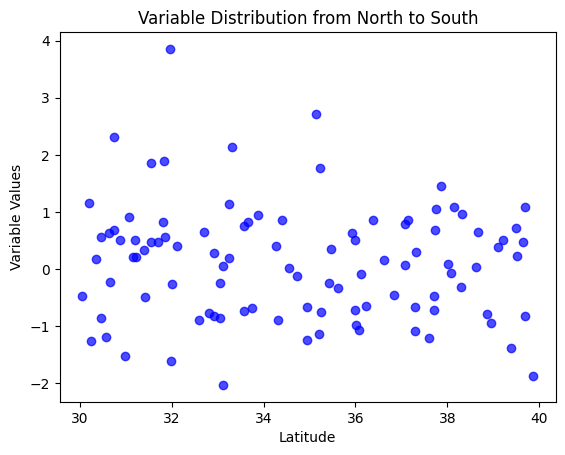

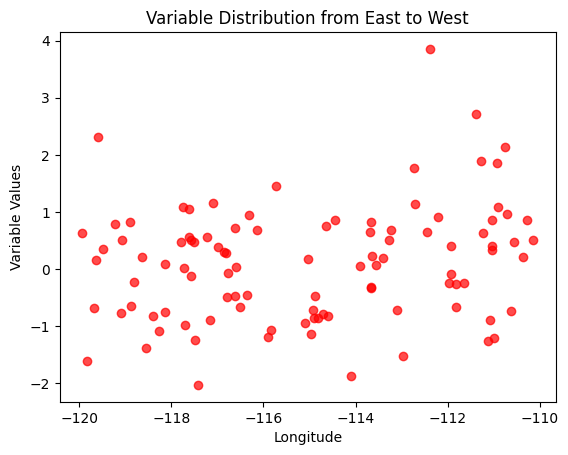

In [5]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Sort the GeoDataFrame by latitude
gdf_sorted = gdf.sort_values(by='geometry', key=lambda geometry: gdf.geometry.y)


# Plot the scatter plot to show how values are distributed from north to south
plt.scatter(gdf_sorted.geometry.y, gdf_sorted['Variable'], color='blue', alpha=0.7)
plt.title('Variable Distribution from North to South')
plt.xlabel('Latitude')
plt.ylabel('Variable Values')
plt.show()


# Plot the scatter plot to show how values are distributed from north to south
plt.scatter(gdf_sorted.geometry.x, gdf_sorted['Variable'], color='red', alpha=0.7)
plt.title('Variable Distribution from East to West')
plt.xlabel('Longitude')
plt.ylabel('Variable Values')
plt.show()


In [6]:
import geopandas as gpd
from shapely.geometry import box

# Example: Creating a bounding box as the clip geometry
clip_box = gpd.GeoDataFrame(geometry=[box(3, 3, 10, 10)])

# Example: Creating a GeoDataFrame with some polygons to be clipped
polygons = gpd.GeoDataFrame(geometry=[
    box(1, 1, 5, 5),
    box(4, 4, 8, 8),
    box(7, 7, 12, 12)
])

# Perform the clip operation
clipped_result = gpd.clip(polygons, clip_box.unary_union)

# Print the original and clipped GeoDataFrames
print("Original Polygons:")
print(polygons)

print("\nClipped Result:")
print(clipped_result)

Original Polygons:
                                            geometry
0  POLYGON ((5.00000 1.00000, 5.00000 5.00000, 1....
1  POLYGON ((8.00000 4.00000, 8.00000 8.00000, 4....
2  POLYGON ((12.00000 7.00000, 12.00000 12.00000,...

Clipped Result:
                                            geometry
0  POLYGON ((5.00000 5.00000, 5.00000 3.00000, 3....
1  POLYGON ((4.00000 4.00000, 4.00000 8.00000, 8....
2  POLYGON ((7.00000 7.00000, 7.00000 10.00000, 1...


<Axes: >

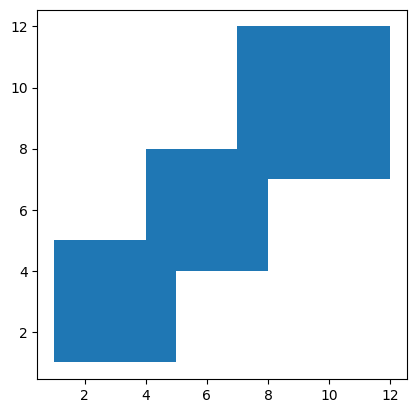

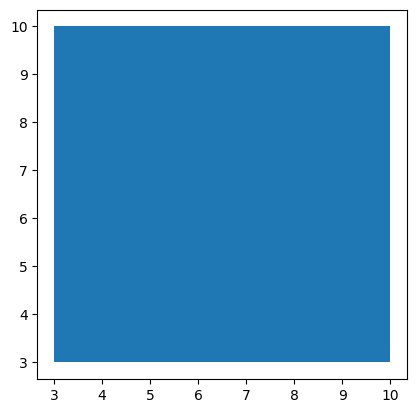

In [7]:
polygons.plot()
clip_box.plot()

<Axes: >

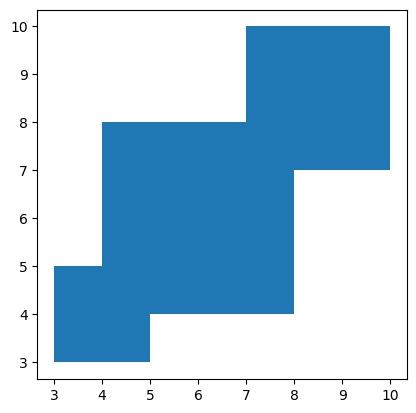

In [8]:
clipped_result.plot()

In [9]:
gdf

,Variable,geometry
0,-0.680025,POINT (-119.68571 33.74540)
1,0.232254,POINT (-113.63590 39.50714)
2,0.293072,POINT (-116.85644 37.31994)
3,-0.714351,POINT (-114.91429 35.98658)
4,1.865775,POINT (-110.92434 31.56019)
...,...,...
95,-0.653329,POINT (-116.50790 34.93796)
96,1.765454,POINT (-112.74044 35.22733)
97,0.404982,POINT (-111.02890 34.27541)
98,-1.260884,POINT (-111.12914 30.25419)


Expected R 0.5
Observed R : 0.5272518772576599
R Value  1.055


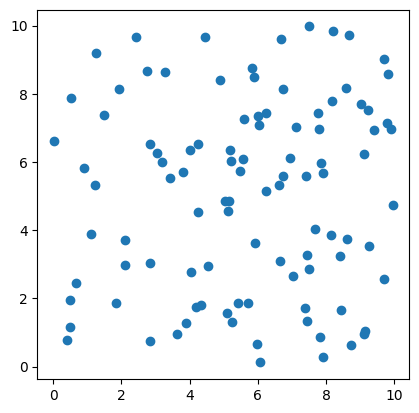

In [10]:
import geopandas as gpd
from shapely.geometry import Point
import random
from scipy.spatial import distance_matrix

# Define the number of sample points
num_points = 100

# Create empty lists to store coordinates and points
coordinates = []
points = []

# Generate random coordinates within a bounding box
bbox = (0, 0, 10, 10)  # (minx, miny, maxx, maxy)

for _ in range(num_points):
    x = random.uniform(bbox[0], bbox[2])  # Random x coordinate
    y = random.uniform(bbox[1], bbox[3])  # Random y coordinate
    coordinates.append((x, y))  # Add coordinates to list
    points.append(Point(x, y))  # Create Point object and add to list

# Create a GeoDataFrame from the points
gdf = gpd.GeoDataFrame(geometry=points)

area = 10*10

r_exp = 1/2 * (np.sqrt((area/num_points)))

print("Expected R",r_exp)


# Extract the coordinates from the GeoDataFrame
points = gdf['geometry'].apply(lambda x: (x.x, x.y)).tolist()

# Calculate the distance matrix between all pairs of points
distances = distance_matrix(points, points)

# Set the diagonal elements (self-distances) to infinity
np.fill_diagonal(distances, np.inf)

# Find the minimum distance for each point
min_distances = distances.min(axis=1)

# Calculate the average nearest distance
r_obs =  min_distances.mean()

print("Observed R :", r_obs)
gdf.plot()

R_val = r_obs/r_exp

print("R Value " ,R_val.round(3))

In [11]:
!pip install pysal -q

C:\Users\Exera\.conda\envs\ac\Lib\site-packages\spaghetti\network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
C:\Users\Exera\.conda\envs\ac\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: >

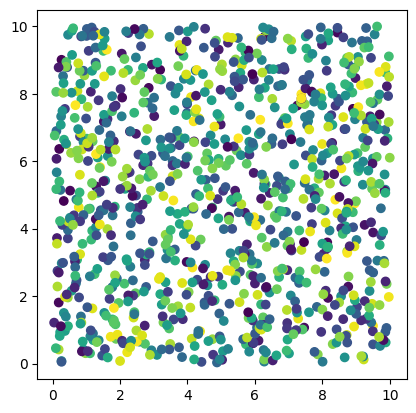

In [12]:
from shapely.geometry import Point

from pysal.lib import weights
from pysal.explore import esda


# Generate random coordinates for 100 points
x_coords = np.random.uniform(low=0, high=10, size=1000)
y_coords = np.random.uniform(low=0, high=10, size=1000)

# Create Point objects using the coordinates
points = [Point(x, y) for x, y in zip(x_coords, y_coords)]

# Define sample values for the points
sample_values = np.random.randint(1, 100, size=1000)

# Create a GeoDataFrame with the points and values
gdf = gpd.GeoDataFrame({'geometry': points, 'values': sample_values})


# Set the active geometry column
gdf = gdf.set_geometry('geometry')

# Create spatial weights
w = weights.DistanceBand.from_dataframe(gdf, threshold=2)

# Calculate Moran's I
moran = esda.moran.Moran(gdf['values'], w)

gdf.plot("values")

In [13]:
# Print Moran's I statistic and p-value
print("Moran's I:", moran.I)
print("p-value:", moran.p_sim)

Moran's I: -0.004028250541704068
p-value: 0.263


In [14]:
gdf

,geometry,values
0,POINT (9.54865 9.75865),45
1,POINT (7.37897 3.36896),90
2,POINT (5.54354 1.82118),92
3,POINT (6.11721 7.89699),69
4,POINT (4.19600 6.58708),8
...,...,...
995,POINT (0.60352 4.11021),83
996,POINT (2.47103 9.07611),43
997,POINT (1.59545 7.14033),35
998,POINT (8.71784 6.07905),78


In [15]:
gdf.shape

(1000, 2)